# An analysis of Japanese Anime: An In-Depth IMDB Data Set

### Purpose
    - Initially, make an Exploratory Data Analysis (EDA) based on genre popularity (Wich genres are most popular based on user ratings and numbers of votes) and year-wise trends (How the popularity of animes has evolved over the years); 
    - Make a Time-Series Analysis, how ratings evolve over time for long-running series;
    - Present those informations and other relevant ones on an interactive dashboard, allowing users to filter by various criteria.

### About the dataset
    The dataset provides a comprehensive view of various animations listed on IMDb that are categorized under the genre "Animation" and originate from Japan. It includes details such as the title, genre, user rating, number of votes, runtime, year of release, summary, stars, certificate, metascore, gross earnings, episode flag, and episode title when applicable.

### Detailed Column Introduction
    Title: The name of the animation.
    Genre: The genre(s) under which the animation falls, e.g., Action, Adventure, etc.
    User Rating: The IMDb user rating out of 10.
    Number of Votes: The total number of IMDb users who have rated the animation.
    Runtime: The duration of the animation in minutes.
    Year: The year the animation was released or started airing.
    Summary: A brief or full summary of the animation's plot. Full summaries are fetched when available.
    Stars: List of main actors or voice actors involved in the animation.
    Certificate: The certification of the animation, e.g., PG, PG-13, etc.
    Metascore: The Metascore rating, if available, which is an aggregated score from various critics.
    Gross: The gross earnings or box office collection of the animation.
    Episode: A binary flag indicating whether the listing is for an episode of a series (1 for yes, 0 for no).
    Episode Title: The title of the episode if the listing is for an episode; otherwise, it will be None.

Dataset link: https://www.kaggle.com/datasets/lorentzyeung/all-japanese-anime-titles-in-imdb

### Exploratory Data Analysis (EDA)

##### Load the data

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('imdb_anime.csv')
data.head()

,Title,Genre,User Rating,Number of Votes,Runtime,Year,Summary,Stars,Certificate,Metascore,Gross,Episode,Episode Title
0,One Piece,"Animation, Action, Adventure",8.9,"187,689",24 min,(1999– ),Follows the adventures of Monkey D. Luffy and ...,"Mayumi Tanaka,Laurent Vernin,Akemi Okamura,Ton...",TV-14,NaN,187689,0,NaN
1,Teenage Mutant Ninja Turtles: Mutant Mayhem,"Animation, Action, Adventure",7.4,"28,895",99 min,(2023),The film follows the Turtle brothers as they w...,NaN,PG,74,28895,0,NaN
2,The Super Mario Bros. Movie,"Animation, Adventure, Comedy",7.1,"189,108",92 min,(2023),A plumber named Mario travels through an under...,NaN,PG,46,189108,0,NaN
3,Attack on Titan,"Animation, Action, Adventure",9.1,"434,457",24 min,(2013–2023),After his hometown is destroyed and his mother...,"Josh Grelle,Bryce Papenbrook,Yûki Kaji,Yui Ish...",TV-MA,NaN,434457,0,NaN
4,Jujutsu Kaisen,"Animation, Action, Adventure",8.5,"82,909",24 min,(2020– ),A boy swallows a cursed talisman - the finger ...,"Junya Enoki,Yûichi Nakamura,Adam McArthur,Yuma...",TV-MA,NaN,82909,0,NaN


##### Year of production

In [5]:
# Take the initial production year by removing brackets and non-numeric characters
data['Init_year'] = data['Year'].str.replace('[^0-9]', '', regex=True)

# Take only the first 4 digits
data['Init_year'] = data['Init_year'].str[:4]

# Convert to numeric (int) and fill NaN with '0'
data['Init_year'] = pd.to_numeric(data['Init_year'], errors='coerce') # parameter erros='coerce': convert erros to NaN values
data['Init_year'] = data['Init_year'].fillna(0).astype(int)

In [6]:
data.head()

,Title,Genre,User Rating,Number of Votes,Runtime,Year,Summary,Stars,Certificate,Metascore,Gross,Episode,Episode Title,Init_year
0,One Piece,"Animation, Action, Adventure",8.9,"187,689",24 min,(1999– ),Follows the adventures of Monkey D. Luffy and ...,"Mayumi Tanaka,Laurent Vernin,Akemi Okamura,Ton...",TV-14,NaN,187689,0,NaN,1999
1,Teenage Mutant Ninja Turtles: Mutant Mayhem,"Animation, Action, Adventure",7.4,"28,895",99 min,(2023),The film follows the Turtle brothers as they w...,NaN,PG,74,28895,0,NaN,2023
2,The Super Mario Bros. Movie,"Animation, Adventure, Comedy",7.1,"189,108",92 min,(2023),A plumber named Mario travels through an under...,NaN,PG,46,189108,0,NaN,2023
3,Attack on Titan,"Animation, Action, Adventure",9.1,"434,457",24 min,(2013–2023),After his hometown is destroyed and his mother...,"Josh Grelle,Bryce Papenbrook,Yûki Kaji,Yui Ish...",TV-MA,NaN,434457,0,NaN,2013
4,Jujutsu Kaisen,"Animation, Action, Adventure",8.5,"82,909",24 min,(2020– ),A boy swallows a cursed talisman - the finger ...,"Junya Enoki,Yûichi Nakamura,Adam McArthur,Yuma...",TV-MA,NaN,82909,0,NaN,2020


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45717 entries, 0 to 45716
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Title            45717 non-null  object
 1   Genre            45717 non-null  object
 2   User Rating      25009 non-null  object
 3   Number of Votes  25009 non-null  object
 4   Runtime          32549 non-null  object
 5   Year             45591 non-null  object
 6   Summary          23547 non-null  object
 7   Stars            13676 non-null  object
 8   Certificate      28694 non-null  object
 9   Metascore        341 non-null    object
 10  Gross            25009 non-null  object
 11  Episode          45717 non-null  object
 12  Episode Title    34910 non-null  object
 13  Init_year        45717 non-null  int32 
dtypes: int32(1), object(13)
memory usage: 4.7+ MB


<Axes: title={'center': 'Animes released over the years.'}, xlabel='Init_year', ylabel='Count'>

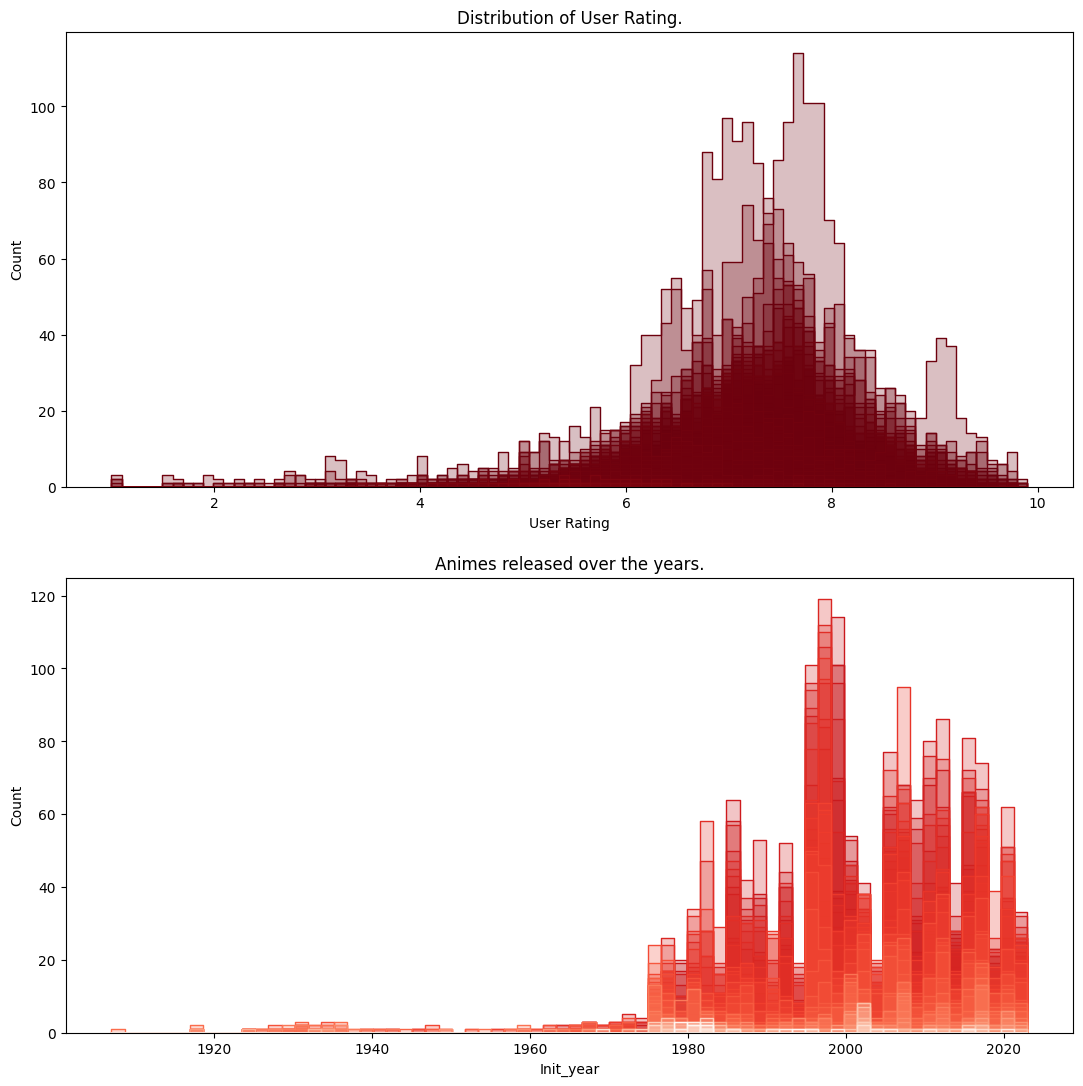

In [51]:
# Convert to numeric and convert errors to NaN
data['User Rating'] = pd.to_numeric(data['User Rating'], errors='coerce')

# Plot
fig, (ax1, ax2) = plt.subplots(figsize=(13, 13), nrows=2)
ax1.set_title('Distribution of User Rating.')
ax2.set_title('Animes released over the years.')
sns.histplot(ax=ax1, data=data, x='User Rating', bins=int(1 + 10 * (data['User Rating'].max() - data['User Rating'].min())), hue='Init_year', legend=False, palette='Reds', element='step')
sns.histplot(ax=ax2, data=data, hue='User Rating', bins=70, x='Init_year', legend=False, palette='Reds', element='step')